In [1]:
import sys
import numpy as np

from pyDFCSR_2D import CSR2D
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from pyDFCSR_2D.tools import plot_surface

## Run DFCSR

In [2]:
import os
print(os.getcwd())

C:\Users\yingb\PycharmProjects\pyDFCSR\pyDFCSR_2D\example


In [3]:
testCSR = CSR2D(input_file= 'input/dipole_config_chirp.yaml')

start reinterpolation. number of slice 1
xbins = 500  zbins =  500


In [4]:
testCSR.CSR_params.compute_CSR = 1
testCSR.run()

Starting the DFCSR run
Drift(L=0.1)
Beam at position 0.1 is written to C:\Users\yingb\PycharmProjects\pyDFCSR\pyDFCSR_2D\example\output\dipole_chirp-2024-08-08T16_43_32-07_00-particles-1.h5
Wakes written to  C:\Users\yingb\PycharmProjects\pyDFCSR\pyDFCSR_2D\example\output\dipole_chirp-2024-08-08T16_43_32-07_00-wakes.h5
Finish step 1, s = 0.1,  in 2.27502179145813 seconds
SBend(L=0.1, P0C=5000000026.237007, G=1.0, DG=0.0, E1=0, E2=0.0, FINT=0.0, HGAP=0.1, FINTX=0.5, HGAPX=0.0, FRINGE_AT='both_ends', FRINGE_TYPE='linear_edge', TILT=0.0)
Beam at position 0.2 is written to C:\Users\yingb\PycharmProjects\pyDFCSR\pyDFCSR_2D\example\output\dipole_chirp-2024-08-08T16_43_32-07_00-particles-2.h5
Finish step 2, s = 0.2,  in 2.551178216934204 seconds
SBend(L=0.1, P0C=5000000026.237007, G=1.0, DG=0.0, E1=0.0, E2=0.0, FINT=0.0, HGAP=0.1, FINTX=0.5, HGAPX=0.0, FRINGE_AT='both_ends', FRINGE_TYPE='linear_edge', TILT=0.0)
Finish step 3, s = 0.30000000000000004,  in 2.2378780841827393 seconds
SBend(L=0.1

## Parallel Run with MPI

In [4]:
# input yaml file in "./input/dipole_config.yaml"
!mpirun -n 4 python  -m pyDFCSR_mpi_run ./input/chicane_config.yaml

'mpirun' is not recognized as an internal or external command,
operable program or batch file.


## Plot output

In [5]:
from pyDFCSR_2D.postprocessor import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'dipole_chirp-2024-08-08T16_43_32-07_00',
                             work_dir = './output')

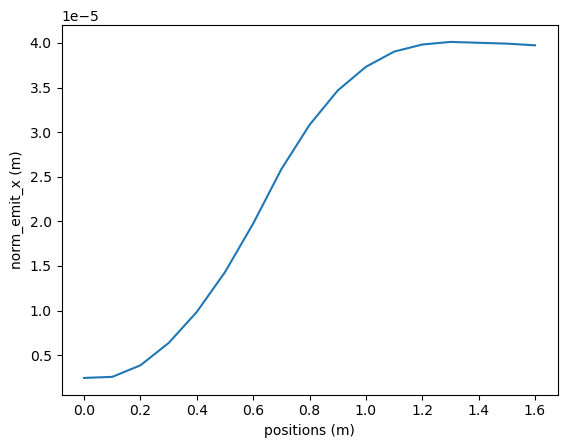

In [6]:
# Plot beam size along the lattice
# Plot beam size along the lattice
x, y = DFplot.get_statistics(key = 'norm_emit_x', show_plot = True)

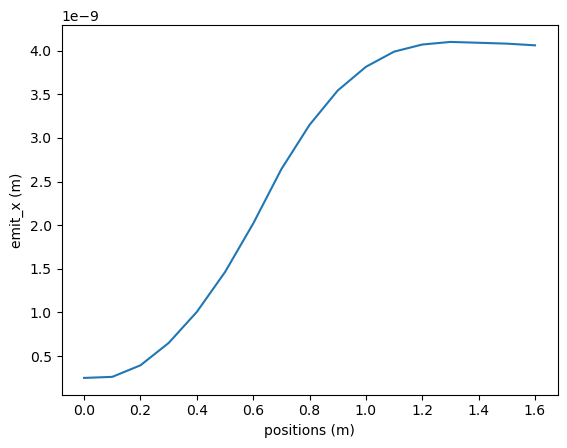

In [7]:
x, y = DFplot.get_statistics(key = 'emit_x', show_plot = True)

plot longitudinal wakes at nearest point s  = 0.8999999999999999 m, step count 9
ebeam energy 5000000026.237007


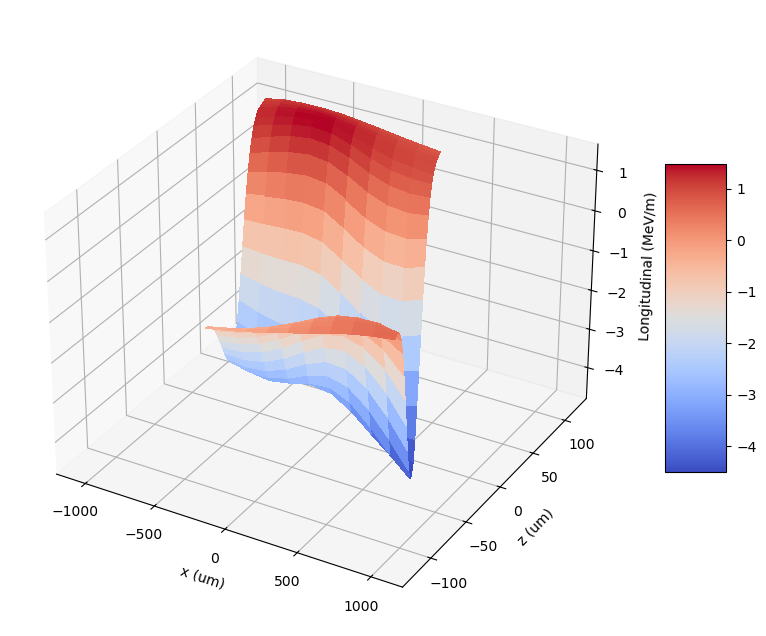

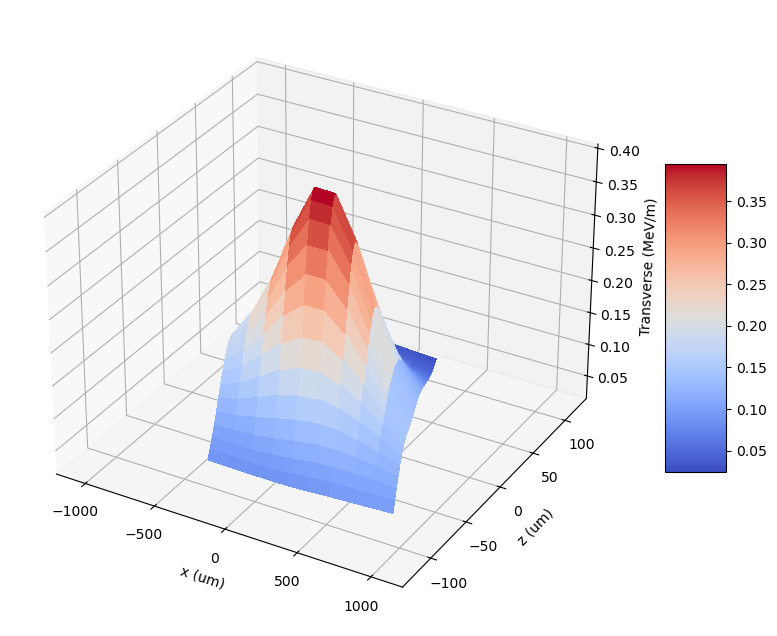

In [8]:
x_grids, z_grids, xkicks, dE_dct = DFplot.get_wakes(s = 0.9, show_plot = True)

Reading  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output\dipole_chirp-2024-06-17T20_36_27-07_00-particles-12.h5


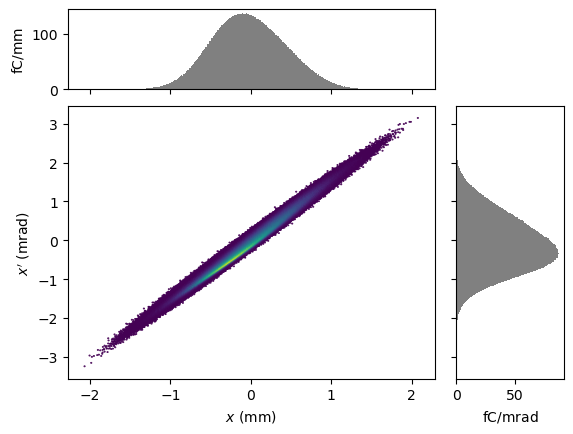

In [8]:
from pmd_beamphysics.plot import density_and_slice_plot
pg  = DFplot.get_particles(step = 12)
pg.plot('x', 'xp')